# Predicting heart disease using machine learning

This notebook looks into using various python-based machine learning and data science libraries in attempt of building a machine learing model capable of predicting weather or not a patient has heart disease or not based on their medical attributes.

approach we are going to take
1. problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem defination
In a statement,
> given clinical parameters about a patient, can we predict weather they have heart disease or not ?

## 2. Data
the original data came from the cleaveland data from UCI machine learning repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

there is also a version of data available in kaggle.
https://www.kaggle.com/ronitf/heart-disease-uci

## 3.Evaluation
> If we can reach 95 % accuracy at predicting whether a patient has heart disease or not during the proof of concept we will persue this project.

## 4. Features

**Create a data dictionary**
1. age in years
2. sex (1 = male; 0 = female)
3. cp chest pain type
    -- Value 1: typical angina
    -- Value 2: atypical angina
    -- Value 3: non-anginal pain
    -- Value 4: asymptomatic
4. trestbps resting blood pressure (in mm Hg on admission to the hospital)
5. chol serum cholestoral in mg/dl
6. fbs (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
7. restecg resting electrocardiographic results
8. thalach maximum heart rate achieved
9. exang exercise induced angina (1 = yes; 0 = no)
10. oldpeak ST depression induced by exercise relative to rest
11. slope the slope of the peak exercise ST segment
12. ca number of major vessels (0-3) colored by flourosopy
13. thal 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target 1 or 0


## Preparing the tools
we are going to use pandas, Matplotlib and Numpy for data analysis and manipulations

In [1]:
# Import all the tools we need

# data anlysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve


## Load Data

In [5]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (Explonatory analysis on data)
The goal is to find out more about data and become a subject matter expert on the data
1. what questions are you trying to solve 
2. what kind of data do we have and how do we treat diffrent types
3. what is missing from the data and how do we deal with it?
4. where are the outliers and why should you care about them
5. how can you add, change or remove features to get more out of your data



In [6]:
#lets explore the data 
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

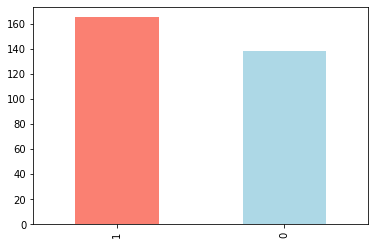

In [8]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequency according to sex 

In [14]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
#compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


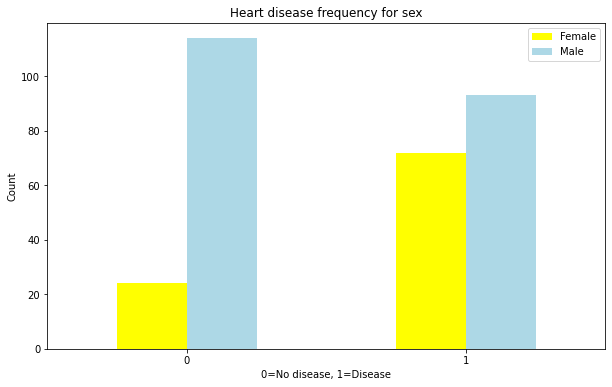

In [21]:
#create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["yellow","lightblue"]); 
plt.title("Heart disease frequency for sex")
plt.xlabel("0=No disease, 1=Disease")
plt.ylabel("Count")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease

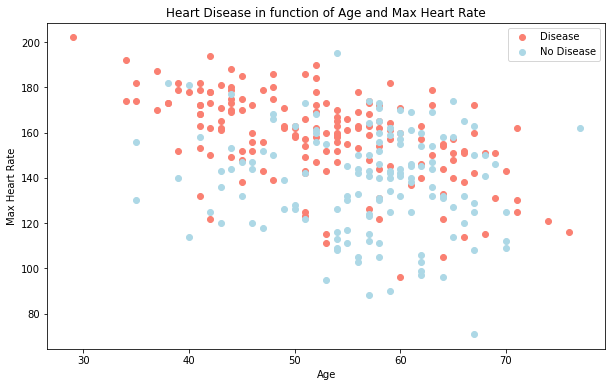

In [26]:
# create another figure 
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],
           c="salmon");

#Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],
           c="lightblue");

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);


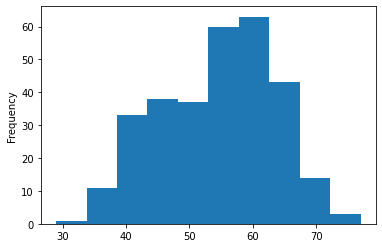

In [28]:
# check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart disease frequency per chest pain type
cp chest pain type 

0. typical angina
1. atypical angina 
2. non-anginal pain 
3. asymptomatic

In [29]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


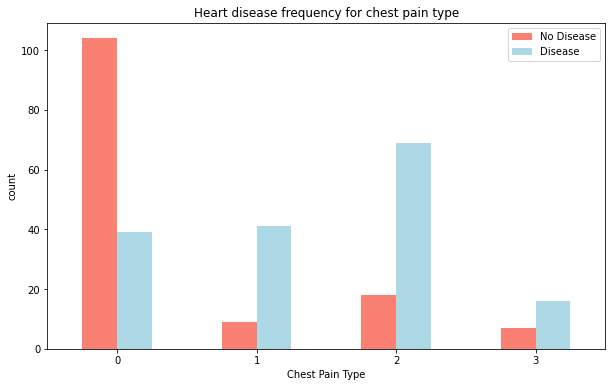

In [30]:
# make the cross tab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart disease frequency for chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("count")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [31]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


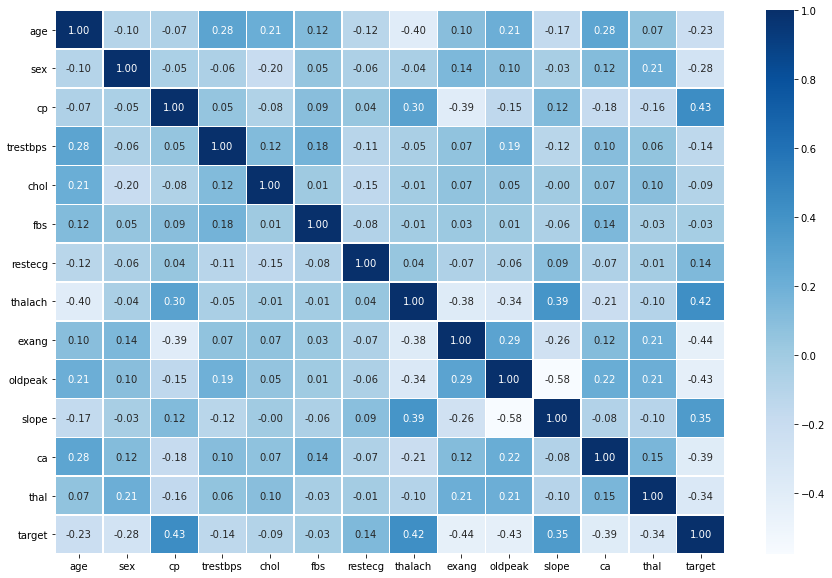

In [34]:
# lets make our corelation matrix more visual
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="Blues");

## Modeling

In [35]:
# Split the data in to X and y
X=df.drop("target",axis=1)
y=df["target"]

In [36]:
# Split data into train set and test set
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Now we have got our data split in train and test set its time to experiment and build our machine learning classification model
and use our test set to see how well our model performs

3 diffrent machinelearning models are being tested
1. logistic regression
2. KNN 
3. RandomForestClassifier

In [41]:
# put models in a dictionary
models={"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

#create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and Evaluates given machine learning models
    models:a dict of diffrent scikit-learn models
    X_train: train data(no labels)
    X_test: test data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # set Random seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    models_scores={}
    #loop through models
    for name, model in models.items():
        #fit the data to the model
        model.fit(X_train,y_train)
        #evaluate the model andappend the score to model score 
        models_scores[name]=model.score(X_test,y_test)
    return models_scores

In [44]:
model_scores=fit_and_score(models=models,
                          X_train=X_train,
                          X_test=X_test,
                          y_train=y_train,
                          y_test=y_test)
model_scores

C:\Users\ADMIN\Desktop\Machine_leanrning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparission

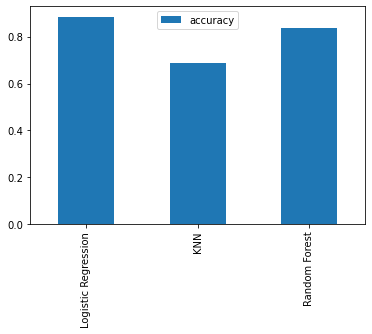

In [46]:
model_compare=pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we have a baseline model.our first predictions are not always final predictions
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross validation
* Precission 
* Recall 
* f1 score
* Classification report
* ROC Curve
* Area under the curve (AUC)
### Hyper Parameter tuning

In [49]:
# lets tune KNN 
train_scores=[]
test_scores=[]

# create a list of diffrent values for n_neighbours
neighbors=range(1,21)
# setup KNN instance
knn=KNeighborsClassifier()

#loop through diffrent n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #fit the data 
    knn.fit(X_train,y_train)
    # update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    #update the test score list
    test_scores.append(knn.score(X_test,y_test))
    

In [50]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [51]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


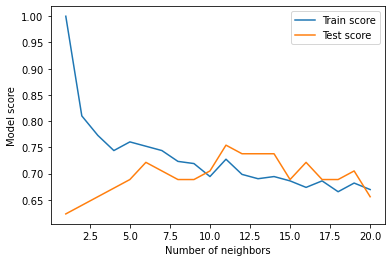

In [53]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%");



### Hyperparameter tuning with RandomizedSearchCV

In [63]:
# creating a hyperparameter grid for logistic Regression
log_reg_grid={"C": np.logspace(-4,4,20),
             "solver":["liblinear"]}

#creating a hyperparameter grid for RandomForestClassifier
rf_grids={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

Now we have got hyperparameter grids for our models lets tune them using RandomizedSearchCV

In [60]:
# Tune LogisticRegression
np.random.seed(42)

#setup random hyperparameter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,
                             cv=5,n_iter=20,verbose=True)

#fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [61]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [62]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we have tuned Now lets RandomForest classifier

In [64]:
# tuning RandomForestClassifier
np.random.seed(42)

#setup random hyperparameter search for RandomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grids,
                        cv=5,n_iter=20,verbose=True)

#fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [65]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [67]:
rs_rf.score(X_test,y_test)

0.8688524590163934

The logisticRegression model has out performed KNN and RandomForestClassifier so we are eliminating these models and moving on 
with logisticRegression model where we will tune it using GridSearchCV to enhance it evn better

#### Hyperparameter Tuning with GridSearchCV for LogisticRegression model

In [68]:
# diffrent Hyperparameters for our LogisticRegression model
log_reg_grid={"C": np.logspace(-4,4,30),
             "solver":["liblinear"]}

#setup grid hyperparameter search for LogisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,
                       cv=5, verbose=True)

#fit grid hyperparameter search model 
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [69]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [70]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

### Evaluating our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC curve
* confusion Matrix
* classification report
* Precission 
* Recall
* F1- Score
    and use cross validation if possible 

In [71]:
# Make predictions with tuned model 
y_preds=gs_log_reg.predict(X_test)

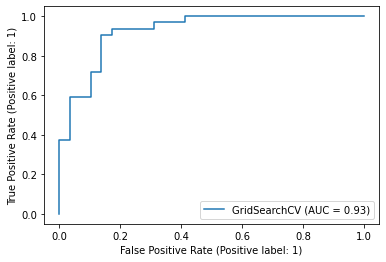

In [73]:
#import ROC curve function from sklearn.metrics(which we have already done)

#Plot ROC and calculate AUC metrics
plot_roc_curve(gs_log_reg,X_test,y_test);

In [74]:
#confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


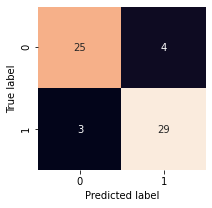

In [79]:
#sns.set(font_size=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

Lets get a classification report and cross-validated precission recall and f1 score

In [80]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation metrics using cross-validation 
we are going to calculate precission recall and f1 score of our model using cross validation and to do so we willbe using 
'cross_val_score()'

In [81]:
#check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [82]:
#create a new classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418, solver= "liblinear")

In [86]:
#cross validated accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [87]:
#cross validated precission
cv_precission=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precission=np.mean(cv_precission)
cv_precission

0.8207936507936507

In [88]:
#cross validate recall
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [89]:
#cross validate f1 score
cv_f1_score=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1_score=np.mean(cv_f1_score)
cv_f1_score

0.8673007976269721

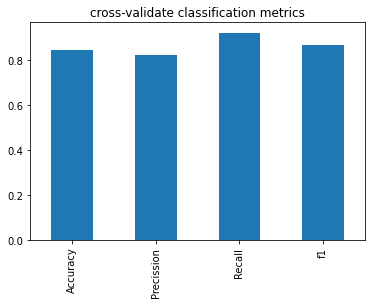

In [90]:
#visualize cross validation metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "Precission":cv_precission,
                        "Recall":cv_recall,
                        "f1":cv_f1_score},
                       index=[0])

cv_metrics.T.plot.bar(title="cross-validate classification metrics", legend=False);

### Feature Importance 
feature importance is another as asking which features contributed most to the outcome of the model and how did they contribute?
* Finding feature importance is diffrent for each machine learning model

In [92]:
#fit an instance on logisticRegression
gs_log_reg.best_params_
clf=LogisticRegression(C=0.20433597178569418, solver= "liblinear")
clf.fit(X_train,y_train);

In [93]:
#check coef_
clf.coef_

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [94]:
#match coefs of the features to columns
feature_dict =dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

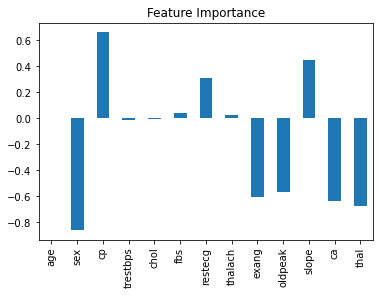

In [95]:
#visualize feature Importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False );

In [ ]:
### Experimentation
If you havent hit your evaluation metrics yet.. ask yourself
1. could you collect more data 
2. could you try a better model ? Like catboost or XGboost
3. could you improve the current model (beyond what we have done)
4. look what you can do more 